In [1]:
import sys
sys.path.append('./src')

import io_utils
import metrics

df = io_utils.get_df()

df.info()

#df.head()

Top 3 kategorier baserat på omsättning:
category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Name: revenue, dtype: float64

Total omsättning: 3502767.2300000004 (avrundad till 3503000)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  2500 non-null   int64  
 1   date      2500 non-null   object 
 2   city      2500 non-null   object 
 3   category  2500 non-null   object 
 4   price     2500 non-null   float64
 5   units     2500 non-null   int64  
 6   revenue   2500 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 136.8+ KB


### 1. Vad säljer vi? – vilka kategorier driver mest intäkt?
Kategorier 'Electronics', 'Sports' respektive ' Clothing' driver mest intäkt.

In [2]:
from metrics import unique_products, category_revenue

print(f"Vi säljer följande unika kategorier: \n {unique_products}")

print(f"\nIntäkt per kategori: \n {category_revenue}")

Vi säljer följande unika kategorier: 
 ['Sports' 'Clothing' 'Home' 'Electronics' 'Toys' 'Beauty']

Intäkt per kategori: 
 category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Home            511070.87
Beauty          163053.97
Toys            143015.99
Name: revenue, dtype: float64


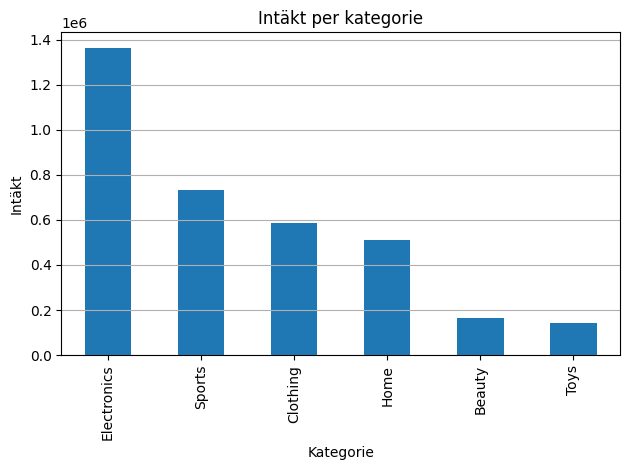

In [3]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots()
category_revenue.plot(kind="bar", ax=ax)
ax.set_title("Intäkt per kategorie")
ax.set_xlabel("Kategorie")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 2. Var säljer vi? – vilka städer står för störst intäkt?
Stockholm, Göteborg respektive Malmö står för störst intakt

In [4]:
from metrics import units_per_city, top_cities, category_per_city
top_cities # sum of revenue per city

,revenue
city,
Stockholm,1227201.94
Göteborg,859019.65
Malmö,567926.32
Uppsala,551478.42
Västerås,297140.90


In [5]:
units_per_city #sum of units per category and city

category,Beauty,Clothing,Electronics,Home,Sports,Toys
city,,,,,,
Göteborg,162,338,425,364,341,158
Malmö,95,228,313,215,247,113
Stockholm,223,574,599,419,539,265
Uppsala,99,303,293,171,178,121
Västerås,80,212,123,109,96,60


In [6]:
category_per_city #sum of revenue per category and city.

category,Beauty,Clothing,Electronics,Home,Sports,Toys
city,,,,,,
Göteborg,42693.20,128566.21,340629.30,137851.89,173114.39,36164.66
Malmö,22151.71,77554.64,234714.72,89276.45,123529.32,20699.48
Stockholm,50001.83,206055.77,457852.44,166671.91,292130.97,54489.02
Uppsala,27956.39,102399.82,236362.78,71514.22,92307.53,20937.68
Västerås,20250.84,72168.47,94668.83,45756.40,53571.21,10725.15


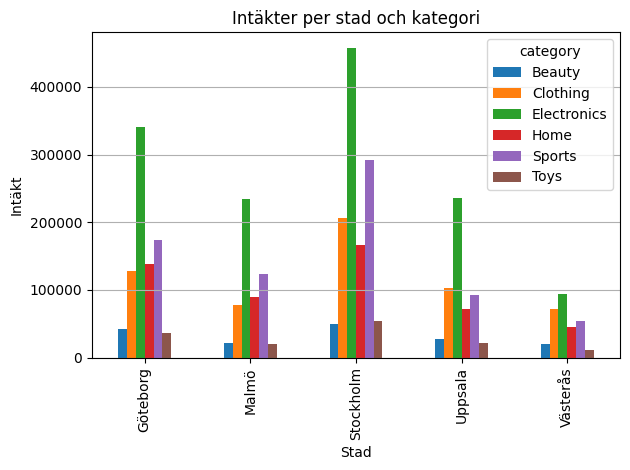

In [7]:
fig, ax = plt.subplots()
category_per_city.plot(kind='bar', ax=ax)
ax.set_title("Intäkter per stad och kategori")
ax.set_xlabel("Stad")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?


In [8]:
from metrics import revenue_by_month, revenue_by_day_of_month

revenue_by_month # Shows the total revenue for the different months


month
6    590259.89
5    632165.16
4    580194.83
3    487602.00
2    548462.03
1    664083.32
Name: revenue, dtype: float64

In [9]:
revenue_by_day_of_month # Shows the best selling days of the months

day
9     156486.43
4     142734.92
23    137403.39
7     134633.50
25    130511.88
21    129325.48
10    128955.11
26    128417.60
17    128181.58
16    127302.09
27    126773.85
1     125049.07
3     118576.22
29    116672.81
18    113459.03
13    113412.81
6     112371.59
24    109436.14
28    108897.74
19    108571.86
8     107904.44
22    105843.54
20    104509.51
15     97686.86
2      97440.77
12     94719.45
5      86780.50
14     86106.95
11     84378.76
30     81256.48
31     58966.87
Name: revenue, dtype: float64

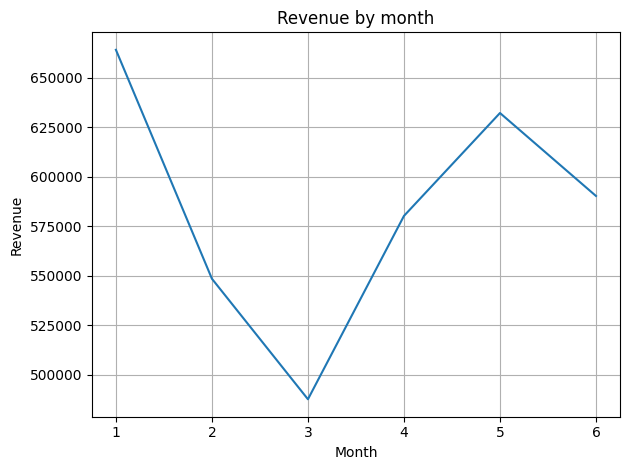

In [10]:
import matplotlib.pyplot as plt

plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue by month")
plt.grid(True)
plt.tight_layout()
plt.show()


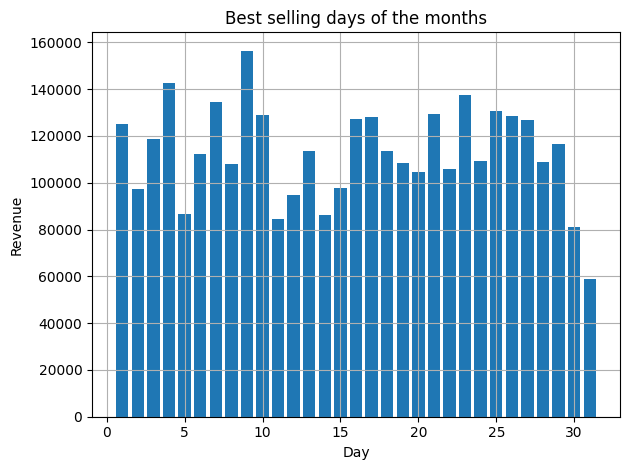

In [11]:
plt.bar(revenue_by_day_of_month.index, revenue_by_day_of_month.values)
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Best selling days of the months")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.


### 5. Topp-listor – topp-3 kategorier efter intäkt.


In [12]:
# Summera intäkt per kategori
kategori_sum = df.groupby("category")["revenue"].sum()

# Plocka fram topp 3
top3 = kategori_sum.nlargest(3)

# Totala intäkten (avrundad uppåt till närmaste 500, med min 1000)
total = kategori_sum.sum()
total_rounded = max(1000, int(np.ceil(total / 500.0) * 500))

print("Top 3 kategorier baserat på omsättning:")
print(top3)
print(f"\nTotal omsättning: {total} (avrundad till {total_rounded})")

NameError: name 'np' is not defined

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?


### Rekommendationer:

Ni ska avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.